---

## Проектная работа. Приоритизация гипотез и анализ А/В-теста

### Цель работы:

Выполнить приоритизацию гипотез подготовленных с отделом маркетинга интернет-магазина, проанализировать результаты А/В-теста и сделать вывод о результатах теста.

### Оглавление: <a id="17"></a>
[Загрузка данных.](#1)

[Предобработка данных.](#2)

[Часть 1. Приоритизация гипотез.](#3)
 
[Часть 2. Анализ A/B-теста:](#4)
 * [2.1 Построение графика кумулятивной выручки;](#5)
 * [2.2 Построение графика кумулятивного среднего чека по группам;](#6)
 * [2.3 Построение графика относительного изменения кумулятивного среднего чека группы В к группе А;](#7)
 * [2.4 Построение графика кумулятивной конверсии по группам;](#8)
 * [2.5 Построение графика относительного изменения кумулятивной конверсии группы В к группе А;](#9)
 * [2.6 Построение точечного графика количества заказов по пользователям;](#10)
 * [2.7 Подсчет 95 и 99 перцентилей количества заказов на пользователя;](#11)
 * [2.8 Построение точечного графика стоимостей заказов;](#12)
 * [2.9 Подсчет 95, 99-го перцентилей стоимости заказов;](#13)
 * [2.10 Подсчет статистической значимости различий в конверсии между группами по «сырым» данным;](#14)
 * [2.11 Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным;](#15)
 * [2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным;](#16)
 * [2.13 Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным;](#18)

[Общий вывод.](#19)

Описание данных
Данные для первой части
Файл hypothesis.csv:

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл orders.csv:

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv:

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных<a id="1"></a>

In [1]:
# Импортирование необходимых библиотек
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Загрузка датасетов
filepath1 = r'C:\Users\Torberg\Documents\Yandex Projects\Project7\hypothesis.csv'
filepath2 = r'C:\Users\Torberg\Documents\Yandex Projects\Project7\orders.csv'
filepath3 = r'C:\Users\Torberg\Documents\Yandex Projects\Project7\visitors.csv'

hypothesis = pd.read_csv(filepath1)
orders = pd.read_csv(filepath2)
visitors = pd.read_csv(filepath3)

In [3]:
#Знакомство с данными датасета hypothesis
hypothesis = hypothesis.rename(str.lower, axis='columns')
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Знакомство с данными датасета orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
display(orders.sample(5))
orders.info()

,transaction_id,visitor_id,date,revenue,group
960,2012277167,2999642019,2019-08-10,28750,B
1150,1722995581,2761566146,2019-08-14,1390,A
1143,3551685910,2397025226,2019-08-13,910,B
729,2667448076,2587333274,2019-08-07,6170,B
16,1820531107,2973109265,2019-08-15,1060,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
# Знакомство с данными датасета visitors
display(visitors.sample(5))
visitors.info()

,date,group,visitors
60,2019-08-30,B,490
10,2019-08-11,A,718
45,2019-08-15,B,544
24,2019-08-25,A,621
55,2019-08-25,B,679


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


[в начало](#17)

### Предобработка данных<a id="2"></a>

In [6]:
# Функция-счетчик пропусков по датасету:
def nans_counter(column, data):
    print('Количество пропусков в столбце', column, ':', ((data[column].isna().sum()/len(data[column])*100).round()), '%')
    

In [7]:
# Поиск пропусков в датафрейме orders
for column in orders:
    nans_counter(column, orders)
# Поиск дубликатов
print('Количество дубликатов в orders:', orders.duplicated().sum())

Количество пропусков в столбце transaction_id : 0.0 %
Количество пропусков в столбце visitor_id : 0.0 %
Количество пропусков в столбце date : 0.0 %
Количество пропусков в столбце revenue : 0.0 %
Количество пропусков в столбце group : 0.0 %
Количество дубликатов в orders: 0


In [8]:
# Поиск пропусков в датафрейме visitors
for column in visitors:
    nans_counter(column, visitors)
# Поиск дубликатов
print('Количество дубликатов в orders:', visitors.duplicated().sum())

Количество пропусков в столбце date : 0.0 %
Количество пропусков в столбце group : 0.0 %
Количество пропусков в столбце visitors : 0.0 %
Количество дубликатов в orders: 0


In [9]:
# Изменение типов данных с object на datetime64
orders['date'] = pd.to_datetime(orders['date'], format = ('%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
# Изменение типов данных с object на datetime64
visitors['date'] = pd.to_datetime(visitors['date'], format = ('%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# Проверка корректности разделения пользователей по группам
orders_query = orders[['visitor_id','group']].groupby('visitor_id').agg({'group': 'nunique'})
display(orders_query[orders_query['group'] == 2].count())

group    58
dtype: int64

Вывод

Получено 3 датасета: hypothesis, orders, visitors. В них обнаружены следующие проблемы: заглавные буквы и пробелы в названиях столбцов. Данныев столбцах с данными имеют тип object. Все недостатки устранены, пропусков и дубликатов в данных не обнаружено. Обнаружено 58 покупателей попавших в обе группы А/В-тестирования.

[в начало](#17)

## Часть 1. Приоритизация гипотез<a id="3"></a>

In [12]:
# Создание фреймворка ICE

hypothesis['ice'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'])
display(hypothesis.sort_values(by='ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Промежуточный вывод:

Согласно полученному фреймворку ICE приоритетныии являются гипотезы 8, 0 и 7

In [13]:
# Создание фреймворка RICE

hypothesis['rice'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'])
display(hypothesis.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Промежуточный вывод:

Согласно фреймворку RICE приоритетными к рассмотрению являются гипотезы 7, 2 и 0.

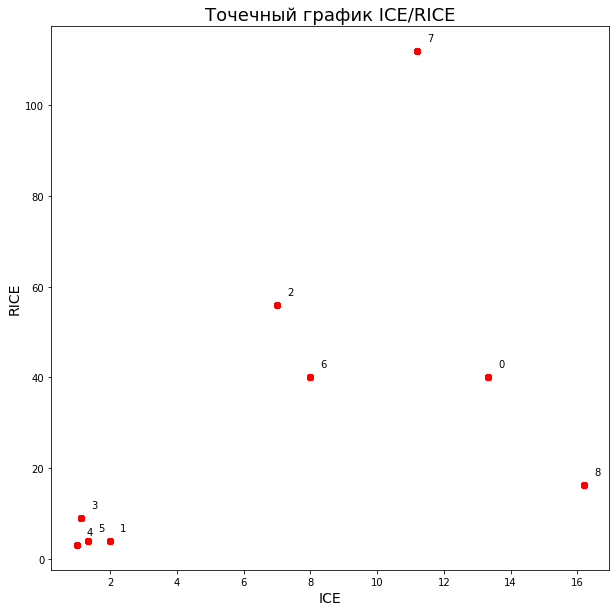

In [14]:
x = hypothesis['ice'].values
y = hypothesis['rice'].values
types = hypothesis.index

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('Точечный график ICE/RICE', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='o', color='red')

## Вывод

При применении RICE фреймворка приоритизация гипотез изменилась: вместо гипотезы 8 более приорететной стала гипотеза 2, наиболее приоритетной стала гипотеза 7. Это связано с тем, что дополнительно учитывается параметр Reach - "охват пользователей". Для 7 гипотезы параметр Reach равен 10 - охватывает всех или практически всех пользователей.

[в начало](#17)

## Часть 2. Анализ результатов А/В-теста<a id="4"></a>

2.1 Построение графика кумулятивной выручки<a id="5"></a>

In [15]:
# Создание датафрейма с уникальными значениями дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()
display(dates_groups.head())

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [16]:
# Создание датафрейма с аггрегированными данными по заказам
orders_aggregated = dates_groups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date': 'max',
    'group': 'max',
    'transaction_id': pd.Series.nunique,
    'visitor_id': pd.Series.nunique,
    'revenue': 'sum'
}), axis = 1).sort_values(by=['date', 'group'])
display(orders_aggregated.head())

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [17]:
# Создание датафрейма с аггрегированными данными по посетителям
visitors_aggregated = dates_groups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date': 'max',
    'group': 'max',
    'visitors': 'sum'
}), axis = 1).sort_values(by=['date', 'group'])
display(visitors_aggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [18]:
# Склеиваем полученные таблицы для построения кумулятивных графиков
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulative_data)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [19]:
# Создание срезов по группам А и В
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'revenue']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'revenue']]

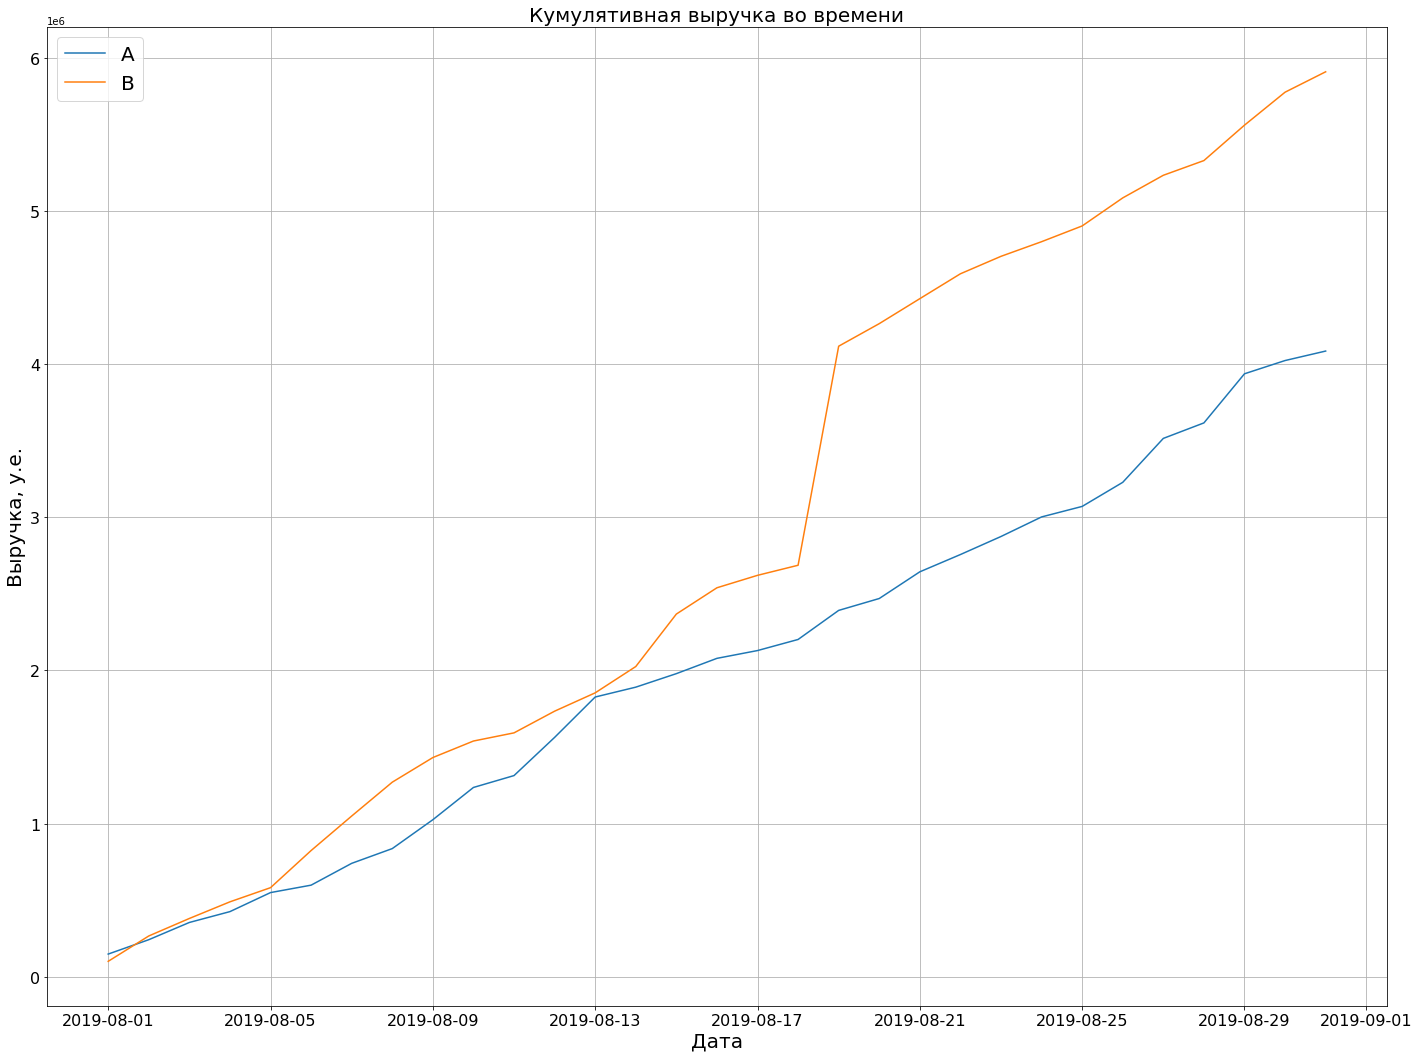

In [20]:
# Построение графиков кумулятивной выручки
plt.figure(figsize = (24, 18))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label = 'B')
plt.title('Кумулятивная выручка во времени', fontsize = 20)
plt.xlabel('Дата', fontsize = 20)
plt.ylabel('Выручка, у.е.', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

Вывод: кумулятивная выручка тестируемых групп пользователей растёт во время исследования. 19.08 в группе В наблюдается резкий скачок, который может исказить результаты исследования. 

[в начало](#17)

2.2 Построение графика кумулятивного среднего чека по группам<a id="6"></a>

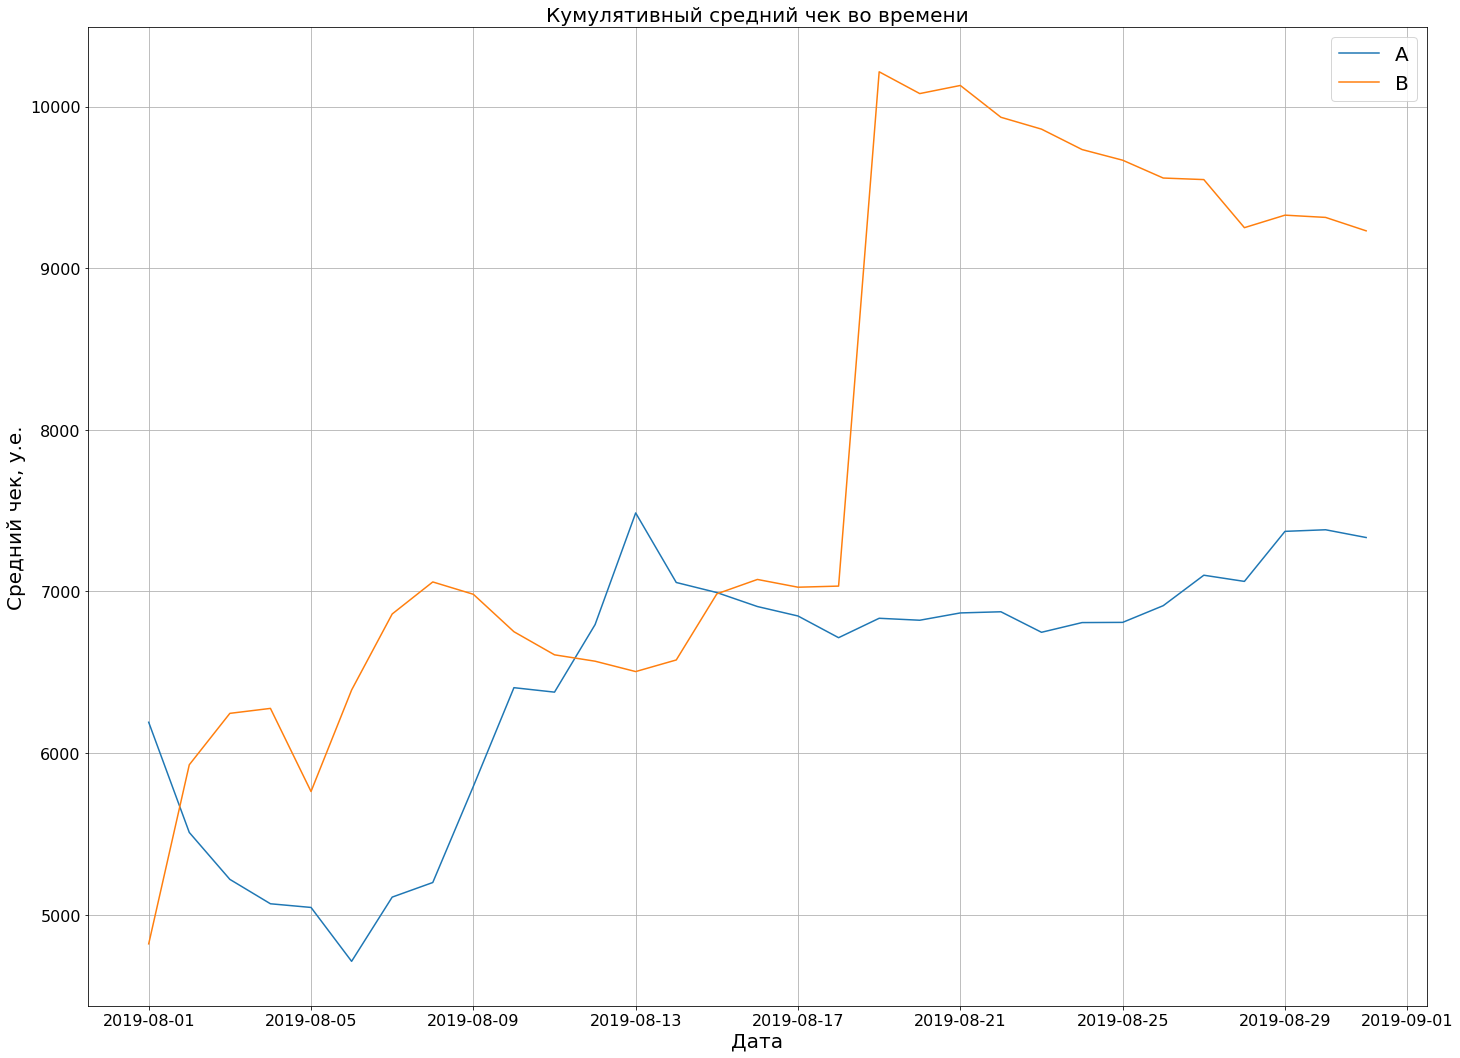

In [21]:
# Построение графика кумулятивного среднего чека по группам
plt.figure(figsize = (24, 18))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label = 'B')
plt.title('Кумулятивный средний чек во времени', fontsize = 20)
plt.xlabel('Дата', fontsize = 20)
plt.ylabel('Средний чек, у.е.', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

Вывод: на графике кумулятивного среднего чека можно наблюдать колебания для обеих исследуемых групп. К концу месяца график стабилизируется: средний чек группы В выше среднего чека А. Но в районе 18-19.08 наблюдается резкий всплеск для тестируемой группы В. Сделать однозначный вывод по этому графику не представляется возможным.

[в начало](#17)

2.3 Построение графика относительного изменения кумулятивного среднего чека группы В к группе А<a id="7"></a>

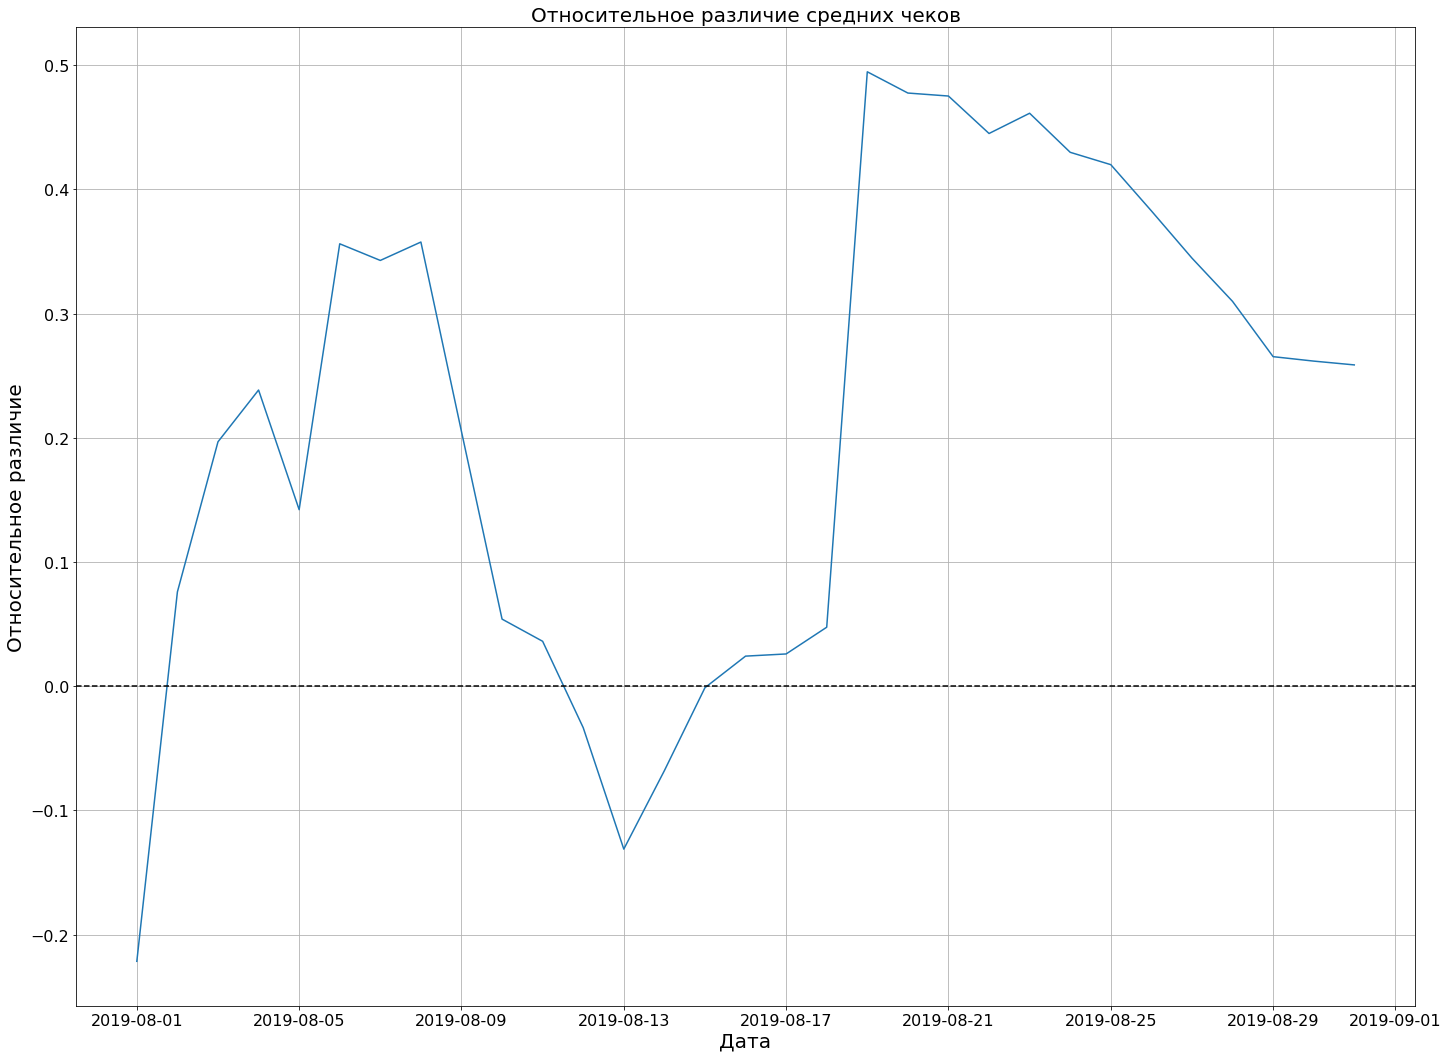

In [22]:
# Построение графика относительного изменения кумулятивного среднего чека группы B к группе A
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date',
                                                       right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (24, 18))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('Относительное различие средних чеков', fontsize = 20)
plt.xlabel('Дата', fontsize = 20)
plt.ylabel('Относительное различие', fontsize = 20)
plt.axhline(y=0, color='black', linestyle='--')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

Вывод: во время проводимого исследования график изменения кумулятивного среднего чека колеблется и в положительную и в отрицательную области. Ближе к концу проводимого исследования график поднимается до значения 0,5 и стабилизируется около значения 0,3 - средний чек группы В дороже среднего чека группы А.

[в начало](#17)

2.4 Построение графика кумулятивной конверсии по группам<a id="8"></a>

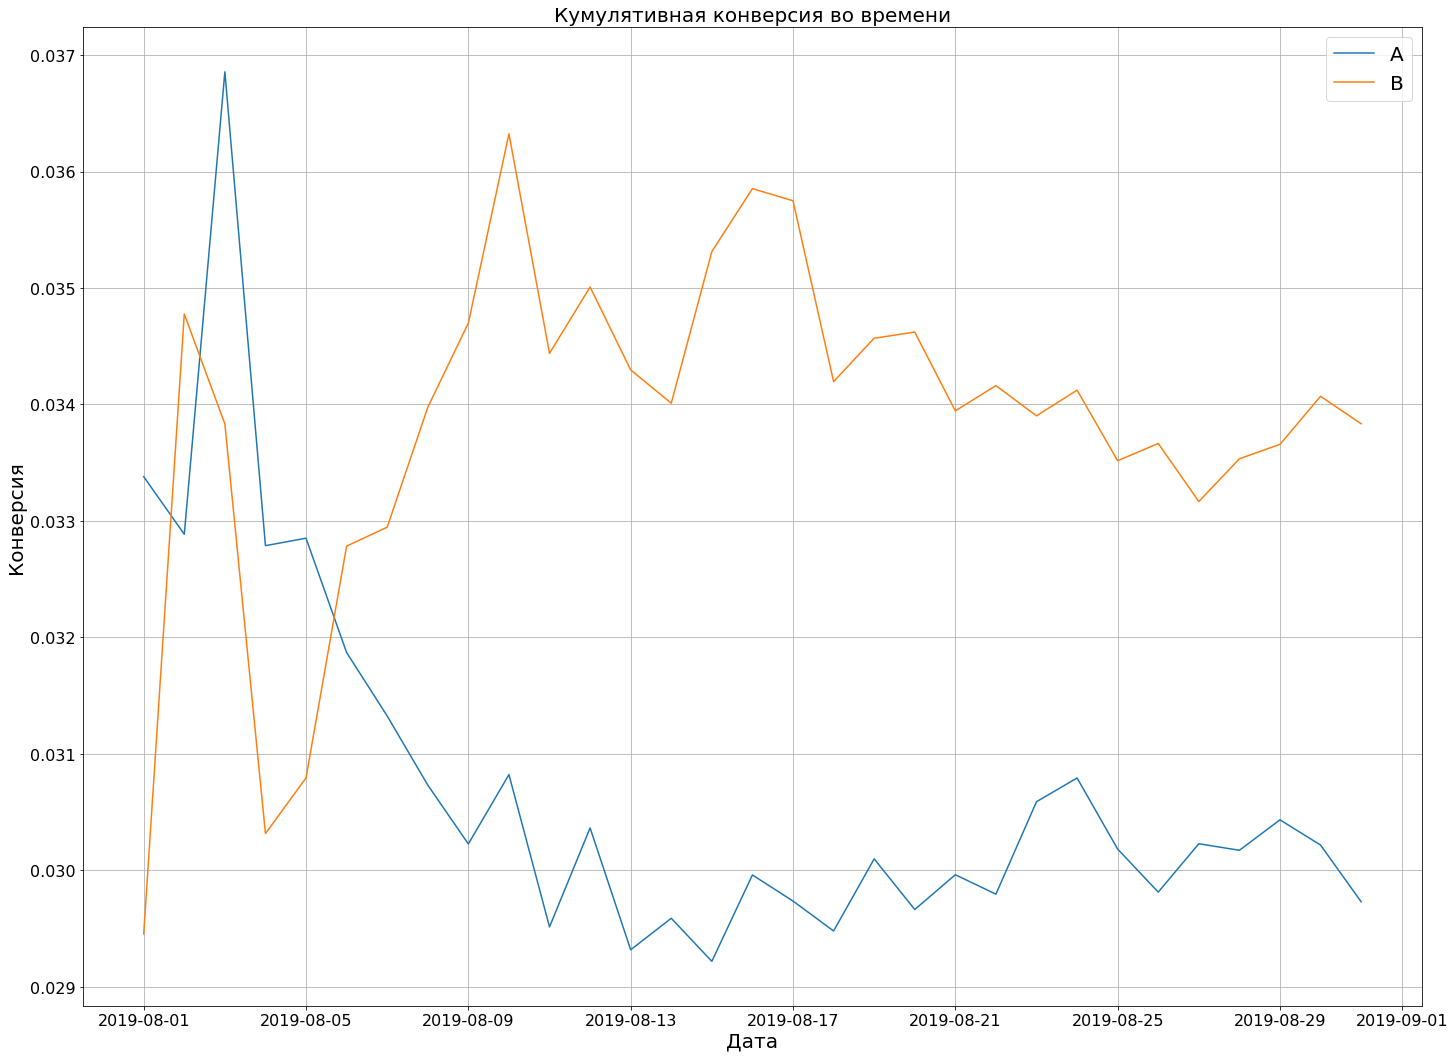

In [23]:
# Построение графика кумулятивной конверсии по группам
# Добавление столбца с конверсией для построения необходимого графика
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Построение графика
plt.figure(figsize = (24, 18))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label = 'B')
plt.title('Кумулятивная конверсия во времени', fontsize = 20)
plt.xlabel('Дата', fontsize = 20)
plt.ylabel('Конверсия', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

Вывод: после сильных колебаний в начале исследования графики стабилизируются около значений 0,030 для группы А и 0,034 для группы В, что позволяет сделать вывод о более высокой конверсии для группы В.

[в начало](#17)

2.5 Построение графика относительного изменения кумулятивной конверсии группы В к группе А<a id="9"></a>

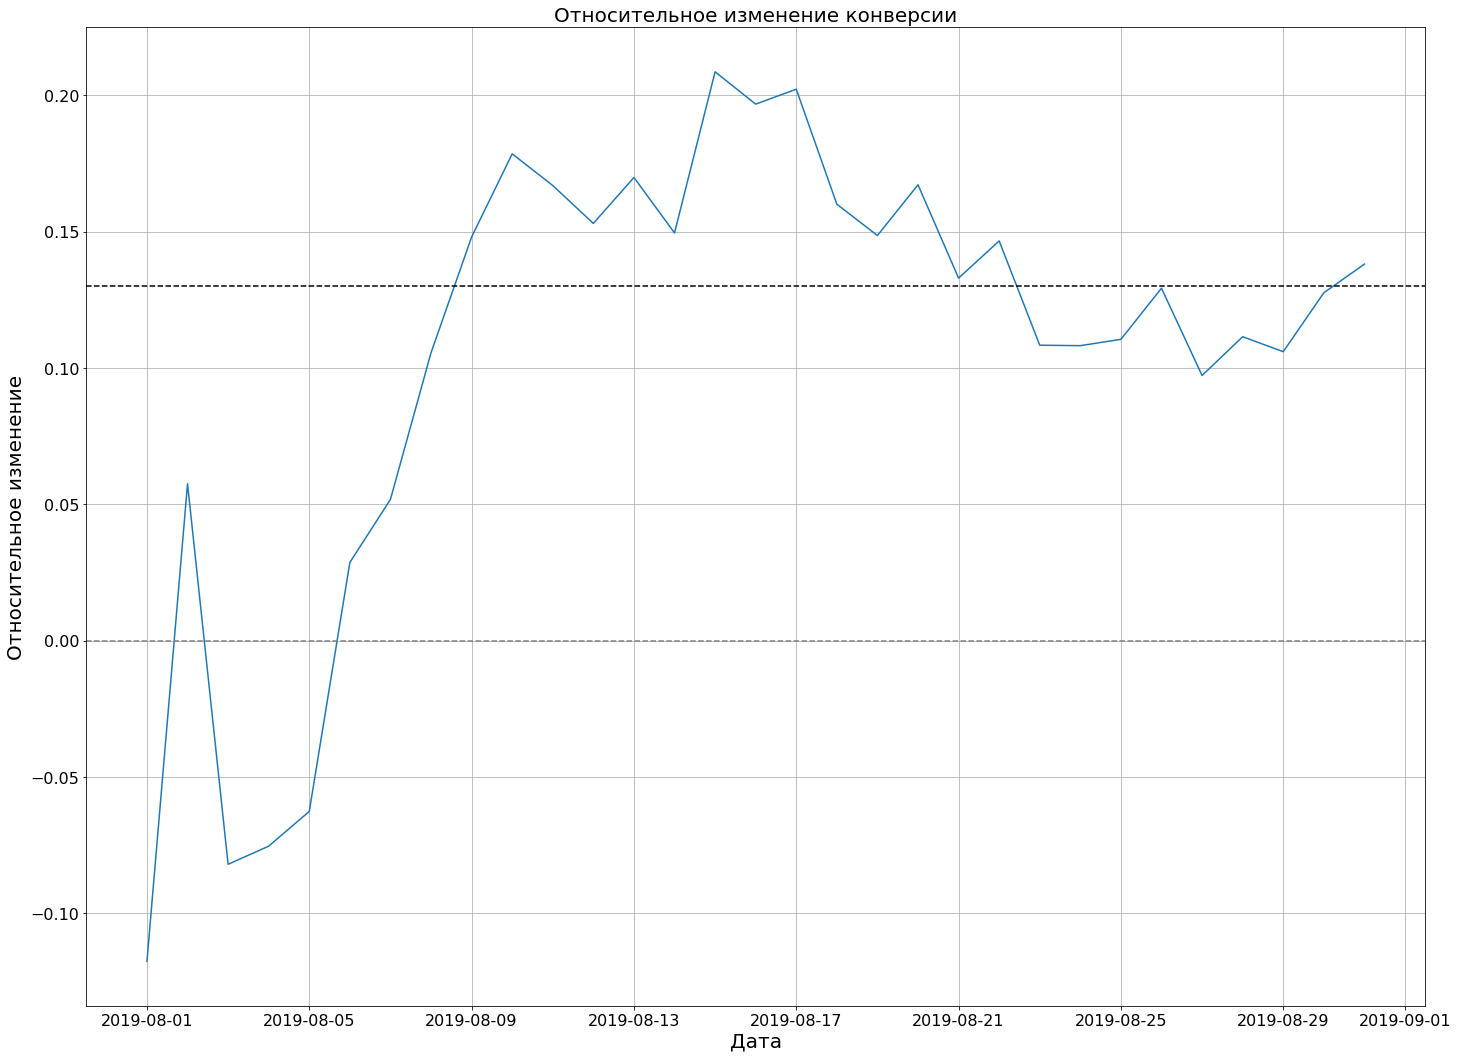

In [24]:
# Построение графика относительного изменения кумулятивной конверсии группы В к группе А

merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']],
                                                                               left_on='date', right_on='date', how='left',
                                                                               suffixes=['A', 'B'])

plt.figure(figsize = (24, 18))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/
                                                merged_cumulative_conversions['conversionA'] -1)
plt.title('Относительное изменение конверсии', fontsize = 20)
plt.xlabel('Дата', fontsize = 20)
plt.ylabel('Относительное изменение', fontsize = 20)
plt.axhline(y=0.13, color='black', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

Вывод: график относительного изменения кумулятивной конверсии группы В к группе А позволяет подтвердить вывод, сделанный выше: после колебаний в начале исследования график выходит в положительную область и стабилизируется около значений 0,13-0,14. То есть кумулятивная конверсия посетителей в покупатели у группы В выше.

[в начало](#17)

2.6 Построение точечного графика количества заказов по пользователям<a id="10"></a>

In [25]:
# Подсчет количества заказов каждым пользователем
orders_by_users = orders.drop(['revenue', 'date'], axis=1).groupby(['visitor_id', 'group'], as_index=False).agg({
    'transaction_id': pd.Series.nunique
})
orders_by_users.columns = ['visitor_id', 'group', 'orders']
display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

,visitor_id,group,orders
1079,4256040402,A,7
619,2458001652,B,6
511,2038680547,A,5
596,2378935119,B,5
618,2458001652,A,5
595,2378935119,A,4
45,199603092,A,4
941,3717692402,B,4
963,3803269165,B,4
58,237748145,A,4


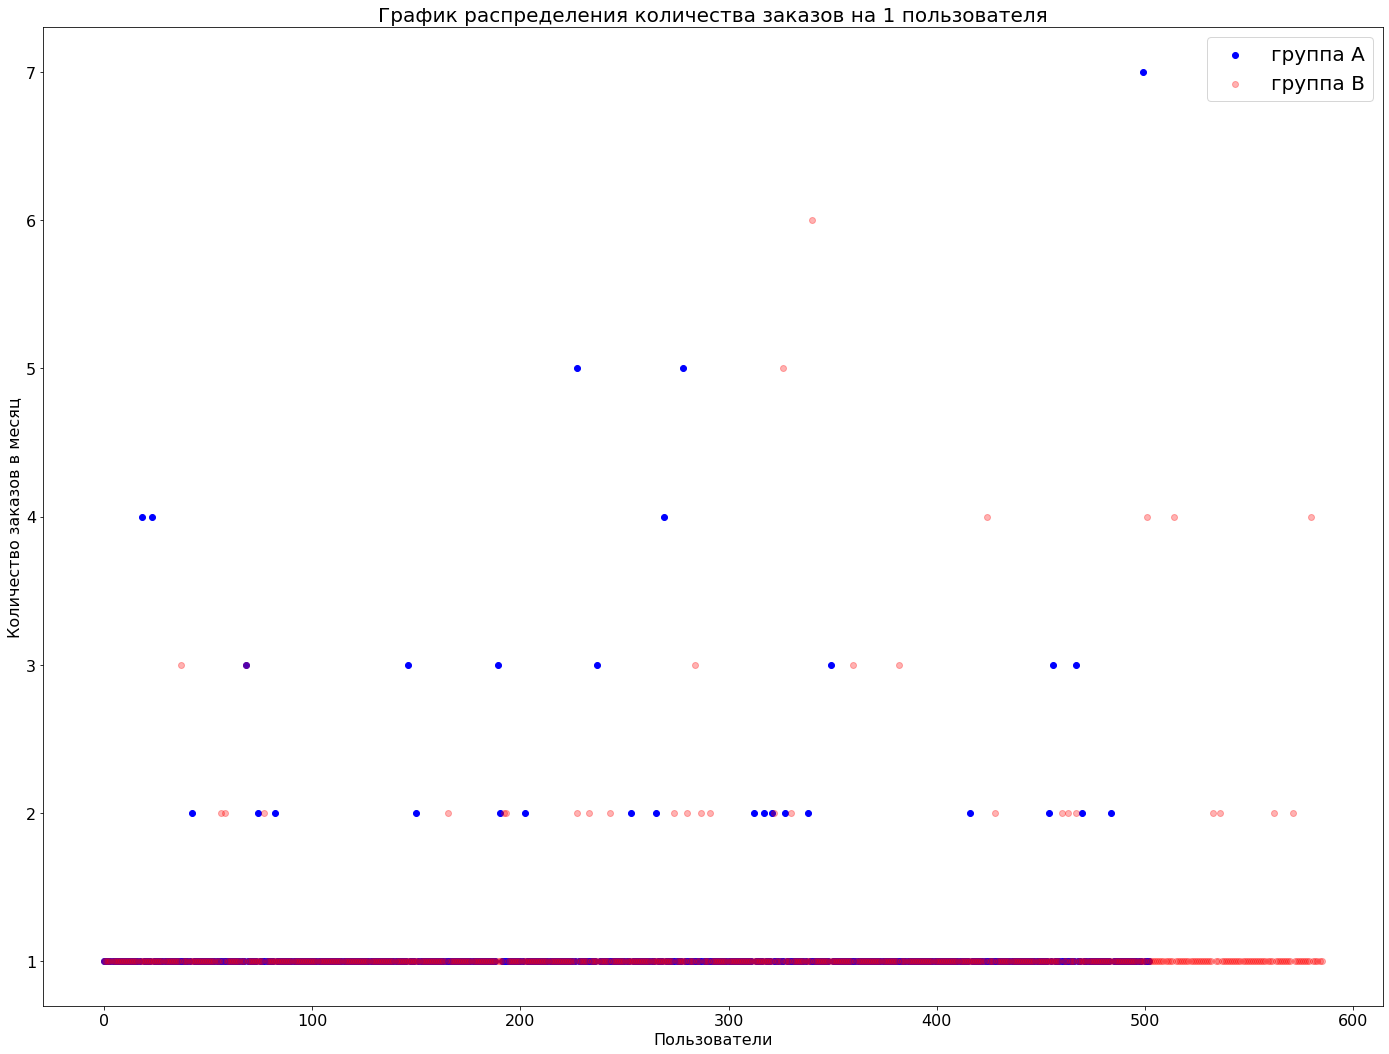

In [26]:
# Построение графика
x_values_a = pd.Series(range(0, len(orders_by_users[orders_by_users['group'] == 'A'])))
x_values_b = pd.Series(range(0, len(orders_by_users[orders_by_users['group'] == 'B'])))
plt.figure(figsize=(24, 18))
plt.scatter(x_values_a, orders_by_users[orders_by_users['group'] == 'A']['orders'], c='b', label='группа A')
plt.scatter(x_values_b, orders_by_users[orders_by_users['group'] == 'B']['orders'], c='r', alpha=0.3, marker='o', label='группа B')
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Количество заказов в месяц', fontsize=16)
plt.title('График распределения количества заказов на 1 пользователя', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize = 20)
plt.show()

Вывод: большинство пользователей делают 1-3 заказа в месяц. Пользователей, совершивших 4 заказа в месяц и более существенно меньше. Чтобы подтвердить это предположение и выбрать "аномальных" пользователей посчитаем 90, 95 и 99-е перцентили по заказам ниже.

2.7 Подсчет 95 и 99 перцентилей количества заказов на пользователя<a id="11"></a>

In [27]:
# Подсчет 95 и 99-го перцентилей
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Вывод: полученные результаты подсчета говорят о том, что 95% всех покупателей совершили 1 или 2 заказа за месяц, 5% покупателей совершили 3 заказа, 1% покупателей совершили 4 заказа и более. Назовем "аномалией" совершение 4-х и более заказов за месяц.

[в начало](#17)

2.8 Построение точечного графика стоимостей заказов<a id="12"></a>

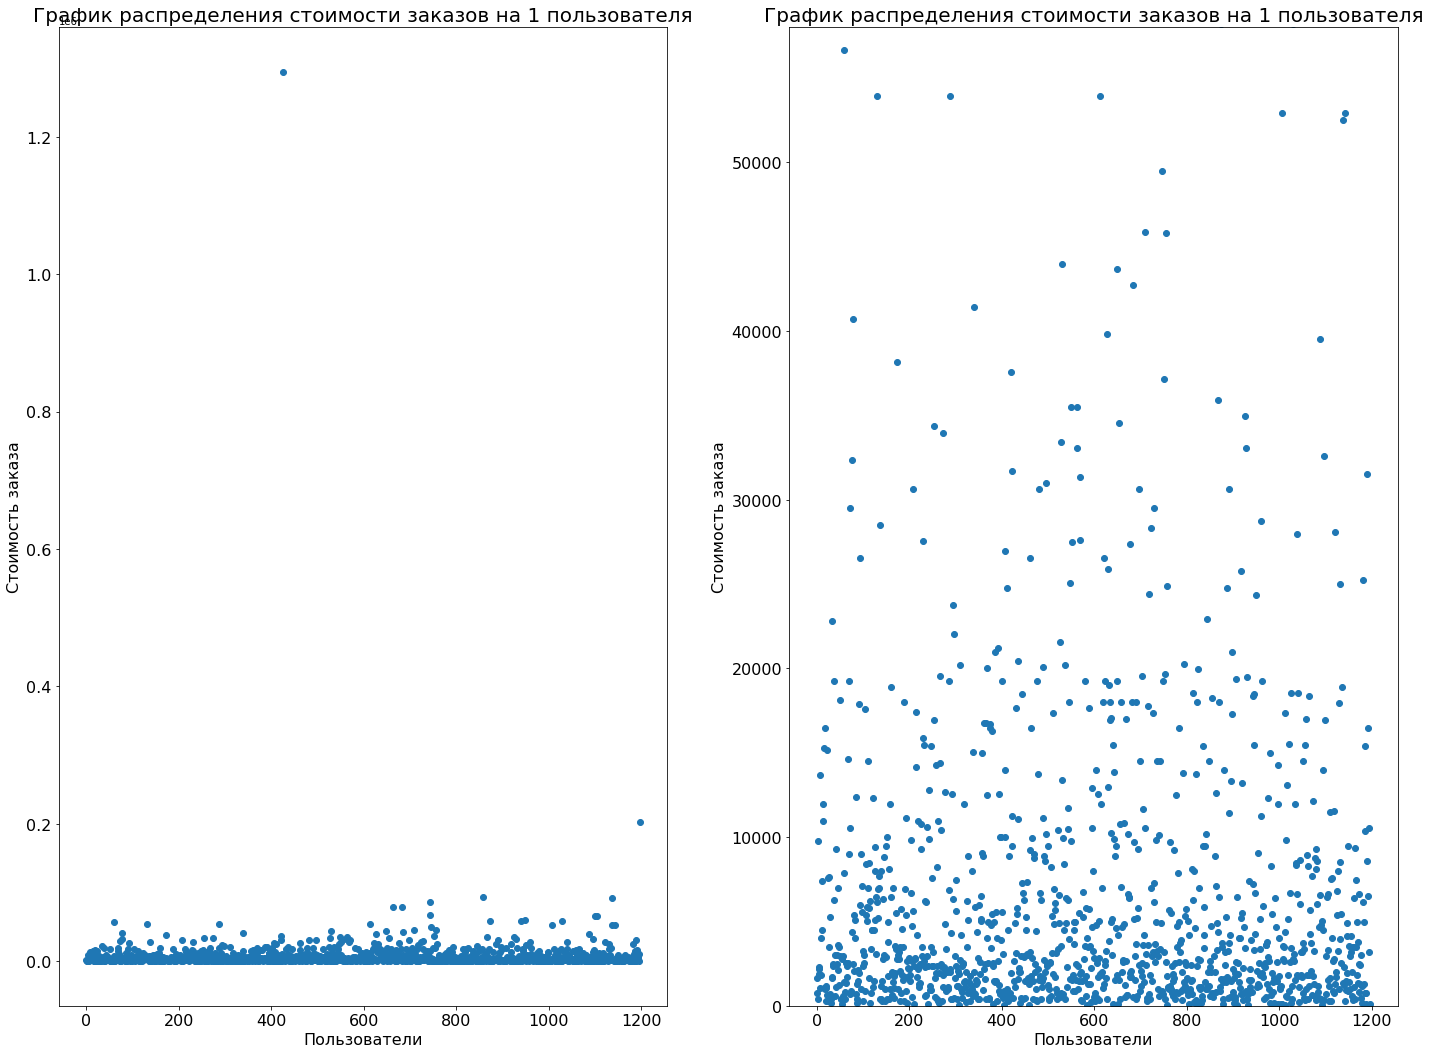

In [28]:
# Построение графика
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(24, 18))
plt.subplot(1,2,1)
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Стоимость заказа', fontsize=16)
plt.title('График распределения стоимости заказов на 1 пользователя', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.subplot(1,2,2)
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи', fontsize=16)
plt.ylabel('Стоимость заказа', fontsize=16)
plt.ylim(0, 58000)
plt.title('График распределения стоимости заказов на 1 пользователя', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Вывод: по точечному графику сложно сделать предположение об "аномальных" по стоимости покупках пользователей, кроме одного с покупкой ценой более 1000000 у.е. Поэтому сразу обратимся к подсчету перцентилей.

2.9 Подсчет 95, 99-го перцентилей стоимости заказов<a id="13"></a>

In [29]:
# Подсчет 95, 99-го перцентилей от стоимости заказов каждого покупателя
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Вывод: у 95% покупателей стоимость заказа не превышает 28000 у.е., у 99% пользователей сумма заказа не превышает 58233.2 у.е. Назовём "аномалией" совершение заказа на сумму более 58000 у.е.

[в начало](#17)

2.10 Подсчет статистической значимости различий в конверсии между группами по «сырым» данным<a id="14"></a>

In [30]:
# Подготовка датафрейма для подсчета статистических значимостей 
# различий в "сырых" и "очищенных" данных
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
visitors_a_cumulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg({
    'date': 'max', 'visitors_per_date_a': 'sum'
}), axis=1)
visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']
visitors_b_cumulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg({
    'date': 'max', 'visitors_per_date_b': 'sum'
}), axis=1)
visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']

orders_a_daily = orders[orders['group'] == 'A'][['transaction_id', 'visitor_id', 'date', 'revenue']]\
.groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']
orders_a_cumulative = orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]\
.agg({'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

orders_b_daily = orders[orders['group'] == 'B'][['transaction_id', 'visitor_id', 'date', 'revenue']]\
.groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']
orders_b_cumulative = orders_b_daily.apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]\
.agg({'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}), axis=1).sort_values(by=['date'])
orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']

data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
    .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')\
    .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [31]:
# Статистическая значимость различий в конверсии между группами по «сырым» данным
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_b.columns = ['visitor_id', 'orders']

In [32]:
# Объявим переменные sample_a, sample_b
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

Выдвигаем гипотезы о статистически значимых различиях между конверсиями групп. 

"Нулевая" гипотеза H0: Не существует статистически значимых различий между конверсиями групп А и В. 

Альтернативная гипотеза Н1: между конверсиями групп А и В существуют статистически значимые различия.

Критический уровень статистической значимости alpha = 0.05

In [33]:
# Проверка "нулевой" гипотезы
alpha = 0.05
print("p_value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост конверсии группы В: {0:.3f}".format(sample_b.mean()/sample_a.mean()-1)) 

p_value: 0.008
Относительный прирост конверсии группы В: 0.138


Вывод: p-value меньше alpha, значит отвергаем "нулевую" гипотезу - между конверсиями групп А и В существует статистически знавимое  различие. Относительный прирост конверсии группы В равен 13,8% по "сырым" данным.

[в начало](#17)

2.11 Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным<a id="15"></a>

Выдвигаем гипотезы о статистически значимых различиях в среднем чеке по группам.

"Нулевая" гипотеза Н0: в среднем чеке по группам А и В существуют статистически значимые различия.

Альтернативная гипотеза Н1: между средними чеками групп А и В статичтически значимых различий нет.

Критический уровень статистической значимости alpha = 0.05

In [34]:
# Статистические значимые различия в среднем чеке
alpha = 0.05
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост среднего чека группы В: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.365
Относительный прирост среднего чека группы В: 0.259


Вывод: p-value значительно больше alpha, значит не можем отвергнуть "нулевую" гипотезу - в средних чеках существут статистически значимые различия. Относительный прирост чека группы В равен 25,9 %

[в начало](#17)

2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным<a id="16"></a>

In [35]:
# Создадим "очищенные" данные
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 4]['visitor_id'], orders_by_users_b[orders_by_users_b['orders'] > 4]['visitor_id']], axis = 0)
users_with_expensive_orders = orders[orders['revenue'] > 58000]['visitor_id']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print(abnormal_users.shape) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
(15,)


In [36]:
# Создадим "отфильтрованные" образцы
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),name='orders')],axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_a['orders'])),name='orders')],axis=0)

Выдвигаем гипотезы о статистически значимых различиях в конверсии в группах А и В по "очищенным" данным:

"Нулевая" гипотеза Н0: Статистически значимых различий между конверсиями групп А и В не существует.

Альтернативная гипотеза Н1: Не существует статистически значимых различий между конверсиями групп А и В.

Критический уровень статистической значимости alpha = 0.05

In [37]:
# Статистически значимые различия по очищенным данным
alpha = 0.05
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print("Относительный прирост конверсии группы В к группе А: {0:.3f}"
      .format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value: 0.009
Относительный прирост конверсии группы В к группе А: 0.148


Вывод: p-value для "очищенных" данных не изменился. Значит отвергаем "нулевую" гипотезу - между конверсиями групп А И В существует статистически значимые различия. Относительный прирост конверсии группы В по "очищенным" данным увеличился и составляет <font color='purple'>14.8%</font>.

[в начало](#17)

2.13 Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным<a id="18"></a>

Выдвигаем гипотезы о различии между средними чеками групп А и В по "очищенным" данным:

"Нулевая" гипотеза Н0: существуют статистически значимые различия между средними чеками групп А и В.

Альтернативная гипотеза Н1: не существует статистически значимых различий между средними чеками групп А и В.

Критический уровень статистической значимости alpha = 0.05

In [38]:
# Проверка гипотез
alpha = 0.05
print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))

print("Относительный прирост среднего чека группы В: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1)) 

p-value: 0.425
Относительный прирост среднего чека группы В: -0.006


Вывод: p-value увеличился, значит всё так же не можем отвергнуть "нулевую" гипотезу - между средними чеками групп А и В существует статистически значимое различие. Однако относительный прирост среднего чека группы В для "очищенных" данных показывает отрицательный результат, то есть средний чек группы В меньше среднего чека группы А.

[в начало](#17)

## Общий вывод:<a id="19"></a>

А/В тест нужно остановить и признать его успешным. В ходе тестирования установлены следующие факты:

1) Относительный прирост конверсии группы В к группе А составил 14.8%

2) Относительный прирост среднего чека группы В к группе А показал отрицательный результат в 0,6% (то есть падение)

Признать А/В-тест успешным позволяют полученные числа: прирост в конверсии в 14,8% это серьёзный результат. С средним чеком необходимо поработать в будущем уже после внесенных изменений в работе интернет-магазина